In [1]:
import pandas as pd
from scipy import stats
from fourinarowfunctions import *

In [2]:
datadir = '../data/'
age = pd.read_csv(datadir + "SubjectAge.csv")
filename = datadir + 'trialdata.csv'
data_dict = load_data(filename, verbose = False)
parsed_dict = {}
for username, data in data_dict.items():
    try:
        parsed_dict[username] = get_parsed_data(data, username)
    except AssertionError as e:
        continue
usernames = sorted(parsed_dict.keys())
usernames.remove("A1153:R_1CwnNA5xXOlHq5l")
usernames.remove("866:R_31YEgt5MqfcfZMC")
usernames.remove("A242:R_ymscU32j53VKwil")
print(f"{len(usernames)} users with complete data")

user A242:R_ymscU32j53VKwil started games after completing the task. Using only the first 37 games
156 users with complete data


In [3]:
quiz_list = get_quiz_answers(data_dict)
quiz_df = pd.DataFrame(quiz_list)
quiz_df = quiz_df[quiz_df["subject"].isin(usernames)]
quiz_df["StudyID"] = quiz_df["subject"].apply(lambda subject: subject.split(":")[0])
quiz_df = pd.merge(quiz_df, age, on="StudyID", how="left")
quiz_df["count"] = 1
quiz_df.head()

,subject,image,expected,given,correct,rt_ms,StudyID,DoB,Gender,ExactAge,FlooredAge,TaskDate,count
0,166:R_9Nac2hjg6u7BlS1,blackHorizontal.png,Black,Black,True,8770,166,10/14/09,M,11.1123,11,11/21/20,1
1,166:R_9Nac2hjg6u7BlS1,whiteDiagonal.png,White,White,True,2511,166,10/14/09,M,11.1123,11,11/21/20,1
2,166:R_9Nac2hjg6u7BlS1,whiteVertical.png,White,White,True,2132,166,10/14/09,M,11.1123,11,11/21/20,1
3,166:R_9Nac2hjg6u7BlS1,whiteNoWin.png,No-one,No-one,True,6503,166,10/14/09,M,11.1123,11,11/21/20,1
4,166:R_9Nac2hjg6u7BlS1,blackDiagonal.png,Black,Black,True,1919,166,10/14/09,M,11.1123,11,11/21/20,1


In [4]:
quiz_per_question = quiz_df[["image", "correct", "rt_ms", "count"]].groupby("image").sum()
quiz_per_question["avg_rt_s"] = quiz_per_question["rt_ms"] / 1000 / quiz_per_question["count"]
quiz_per_question["correct_ratio"] = quiz_per_question["correct"] / quiz_per_question["count"]
quiz_per_question

,correct,rt_ms,count,avg_rt_s,correct_ratio
image,,,,,
blackDiagonal.png,155,391289,156,2.508263,0.993590
blackHorizontal.png,151,1040733,156,6.671365,0.967949
whiteDiagonal.png,155,411379,156,2.637045,0.993590
whiteNoWin.png,142,692258,156,4.437551,0.910256
whiteVertical.png,156,410528,156,2.631590,1.000000


In [5]:
quiz_df.groupby("subject").sum()["correct"].value_counts()

5    138
4     16
3      1
2      1
Name: correct, dtype: int64

In [6]:
age_correct = quiz_df.groupby("subject").mean()[["correct", "ExactAge"]]
age_correct["correct"] = age_correct["correct"] * 5
r, p = stats.spearmanr(age_correct["ExactAge"], age_correct["correct"])
print(f"Correclation = {r}, p = {p}")

Correclation = 0.13643910994805136, p = 0.08943792233002816


In [17]:
age_correct["correct"].value_counts()

5.0    138
4.0     16
2.0      1
3.0      1
Name: correct, dtype: int64

<AxesSubplot:xlabel='ExactAge', ylabel='correct'>

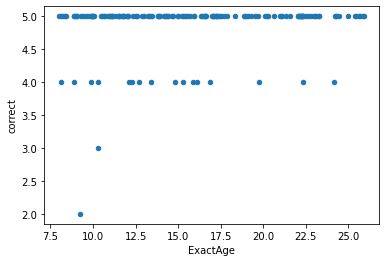

In [7]:
age_correct.plot.scatter(x = "ExactAge", y = "correct")